# Deep Learning - 3

## 3.9 Boston House Pricing

In [1]:
# Listing 4.23 Loading the Boston housing dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [2]:
# shape of data
print("Shape of training data : ",train_data.shape)
print("Shape of training targets : ",train_targets.shape)
print("Shape of testing data : ",test_data.shape)
print("Shape of training targets : ",test_targets.shape)

Shape of training data :  (404, 13)
Shape of training targets :  (404,)
Shape of testing data :  (102, 13)
Shape of training targets :  (102,)


In [3]:
# samples of data
import numpy as np
print("Features of 1st house in training data : ",train_data[0])
print("Price of 1st house in training data : ",train_targets[0])
print("Features of 1st house in test data : ",test_data[0])
print("Price of 1st house in test data : ",test_targets[0])

Features of 1st house in training data :  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Price of 1st house in training data :  15.2
Features of 1st house in test data :  [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
Price of 1st house in test data :  7.2


In [4]:
# visulize data for better understanding
import pandas as pd
df = pd.DataFrame(train_data,
                  columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
df.index.name= "House. NO."
df.columns.name= "Features"
df
df1 = pd.DataFrame(train_targets,columns=["MEDC"])
df1.index.name= "House. NO."
df1.columns.name= "Features"
dff = pd.concat([df,df1],axis=1)
dff.head()

Features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDC
House. NO.,,,,,,,,,,,,,,
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDC     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
dff.describe()

Features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDC
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Listing 4.24 Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [8]:
# visulize data for better understanding
import pandas as pd
df = pd.DataFrame(train_data,
                  columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
df.index.name= "House. NO."
df.columns.name= "Features"
df
df1 = pd.DataFrame(train_targets,columns=["MEDC"])
df1.index.name= "House. NO."
df1.columns.name= "Features"
dff = pd.concat([df,df1],axis=1)
dff.head()

Features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDC
House. NO.,,,,,,,,,,,,,,
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220,15.2
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202,42.3
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500,50.0
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926,21.1
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497,17.7


In [9]:
dff.describe()

Features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDC
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000
mean,-1.015414e-16,1.099231e-17,1.809334e-15,-7.804538e-17,-5.250476e-15,6.431874e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.055261e-16,2.366149e-14,5.967105e-15,6.139204e-16,22.395050
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,9.210442
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00,5.000000
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01,16.675000
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01,20.750000
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01,24.800000
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00,50.000000


In [10]:
# Listing 4.25 Model definition
from tensorflow import keras 
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [11]:
# Listing 4.26 K-fold validation

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_data) // k
# number of epochs
num_epochs = 100
# list with all scores
all_scores = [] 
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    # the equation is like this for 2nd fold (i=1)
      # val_data = train_data[100: 200]
      # val_targets = train_targets[100: 200]
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # select validation data during each fold
    # the equation is like this for 2nd fold (i=1)
      # partial_train_data = np.concatenate([train_data[:100],train_data[200:]],axis=0)
      # partial_train_targets = np.concatenate([train_targets[:100],train_targets[200:]],axis=0)
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()
    # Model fitting
    model.fit(
        partial_train_data, 
        partial_train_targets,
        epochs=num_epochs, 
        batch_size=16, 
        verbose=1)
    
    # validation
    # mse - mean square error
    # mae - mean aboslute error
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    
    # add score to list
    all_scores.append(val_mae)


Processing fold #0
Epoch 1/100
19/19 [==============================] - 1s 3ms/step - loss: 521.9235 - mae: 20.9873
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 391.3587 - mae: 17.8301
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 252.3067 - mae: 13.8122
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 135.6309 - mae: 9.4455
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 72.6825 - mae: 6.5197
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 45.8719 - mae: 5.0757
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 33.0039 - mae: 4.1923
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 26.9104 - mae: 3.6692
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 23.9412 - mae: 3.4160
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 22.0080 - mae: 3.2451
Epoch 11/100
19/19 [===

In [12]:
# all scores list
all_scores

[1.8944485187530518,
 2.6554343700408936,
 2.4450502395629883,
 2.3999648094177246]

In [13]:
# final score average
np.mean(all_scores)

2.3487244844436646

In [14]:
# Listing 4.27 Saving the validation logs at each fold

# number of epochs
num_epochs = 500
# a list to store history on each fold
all_mae_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    # the equation is like this for 2nd fold (i=1)
      # val_data = train_data[100: 200]
      # val_targets = train_targets[100: 200]
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    # the equation is like this for 2nd fold (i=1)
      # partial_train_data = np.concatenate([train_data[:100],train_data[200:]],axis=0)
      # partial_train_targets = np.concatenate([train_targets[:100],train_targets[200:]],axis=0)
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, 
        batch_size=16, 
        verbose=1)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Epoch 1/500
19/19 [==============================] - 1s 10ms/step - loss: 485.3649 - mae: 20.0463 - val_loss: 386.2659 - val_mae: 17.1763
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 338.5709 - mae: 16.3033 - val_loss: 237.4599 - val_mae: 12.8931
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 200.9448 - mae: 11.8781 - val_loss: 119.5807 - val_mae: 8.6316
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 100.4790 - mae: 7.9436 - val_loss: 55.5344 - val_mae: 5.5030
Epoch 5/500
19/19 [==============================] - 0s 5ms/step - loss: 54.0653 - mae: 5.6522 - val_loss: 36.7469 - val_mae: 4.3345
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 35.7929 - mae: 4.5782 - val_loss: 28.4670 - val_mae: 3.7962
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 27.9407 - mae: 3.9999 - val_loss: 23.4004 - val_mae: 3.2797
Epoch 8/500
19/19 [==================

In [15]:
# all_mae_histories
print("type of all_mae_histories : ", type(all_mae_histories))
print("length of all_mae_histories : ", len(all_mae_histories))
print("type of all_mae_histories[0] : ", type(all_mae_histories[0]))
print("length of all_mae_histories[0] : ", len(all_mae_histories[0]))

type of all_mae_histories :  <class 'list'>
length of all_mae_histories :  4
type of all_mae_histories[0] :  <class 'list'>
length of all_mae_histories[0] :  500


In [16]:
# Listing 4.28 Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [17]:
# average_mae_history
print("type of average_mae_history : ", type(average_mae_history))
print("length of average_mae_history : ", len(average_mae_history))
print("type of average_mae_history[0] : ", type(average_mae_history[0]))

type of average_mae_history :  <class 'list'>
length of average_mae_history :  500
type of average_mae_history[0] :  <class 'numpy.float64'>


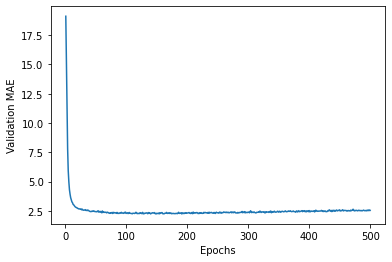

In [18]:
# Listing 4.29 Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

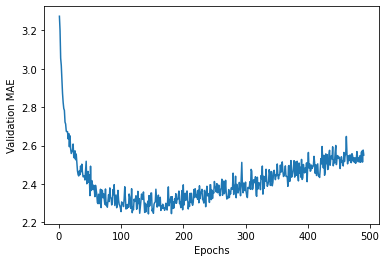

In [19]:
# Listing 4.30 Plotting validation scores, excluding the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [20]:
# Listing 4.31 Training the final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/130
26/26 [==============================] - 1s 3ms/step - loss: 519.8846 - mae: 20.8021
Epoch 2/130
26/26 [==============================] - 0s 3ms/step - loss: 362.0046 - mae: 16.7522
Epoch 3/130
26/26 [==============================] - 0s 3ms/step - loss: 194.2397 - mae: 11.4187
Epoch 4/130
26/26 [==============================] - 0s 3ms/step - loss: 97.0662 - mae: 7.5628
Epoch 5/130
26/26 [==============================] - 0s 3ms/step - loss: 56.9536 - mae: 5.6417
Epoch 6/130
26/26 [==============================] - 0s 3ms/step - loss: 37.1068 - mae: 4.4348
Epoch 7/130
26/26 [==============================] - 0s 3ms/step - loss: 27.9313 - mae: 3.7547
Epoch 8/130
26/26 [==============================] - 0s 3ms/step - loss: 23.5827 - mae: 3.4055
Epoch 9/130
26/26 [==============================] - 0s 3ms/step - loss: 20.3563 - mae: 3.1369
Epoch 10/130
26/26 [==============================] - 0s 3ms/step - loss: 18.7167 - mae: 2.9601
Epoch 11/130
26/26 [=======================

In [21]:
# test score
test_mae_score

2.5557525157928467

In [22]:
# test target for 1st house
test_targets[0]

7.2

In [23]:
# predection for first house in the test sample
predictions = model.predict(test_data)
predictions[0]

array([9.838465], dtype=float32)